In [1]:
import SIRmodels as mdl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib qt

### Peak position and final size of infected by parameters

Text(0, 0.5, 'Number of infected')

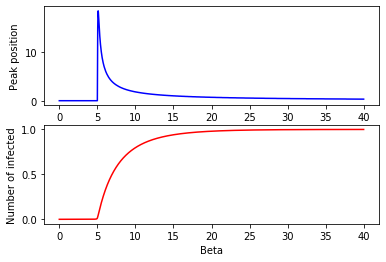

In [2]:
# Changing beta
beta_arr = np.arange(0, 40, 0.01)

# Originals values
N = 1000000
SIR0 = np.zeros(3)
SIR0[1] = 100
SIR0[0] = N - np.sum(SIR0[1:2])

t_start = 0
t_end = 100
n_int = 10000
t_sim = np.linspace(t_start, t_end, n_int)

norm = True
params = [10, 5]

peak = np.zeros(len(beta_arr))
ninf = np.zeros(len(beta_arr))
for i in np.arange(len(beta_arr)):
    params[0] = beta_arr[i]
    sir = mdl.SIR(SIR0, params, t_sim)
    sir.runEvaluation(norm)
    try:
        peak[i] = t_sim[sir.getDisease()[1]][0]
    except:
        peak[i] = t_sim[0]
    ninf[i] = sir.getNInfected()

fontsize = 8
fig, ax = plt.subplots(2, 1)

ax[0].plot(beta_arr, peak,'-b')
ax[0].set_xlabel('Beta')
ax[0].set_ylabel('Peak position')

ax[1].plot(beta_arr, ninf, '-r')
ax[1].set_xlabel('Beta')
ax[1].set_ylabel('Number of infected')


Text(0, 0.5, 'Number of infected')

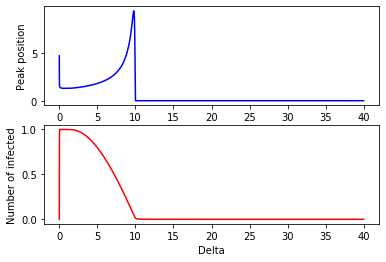

In [4]:
# Changing delta
delta_arr = np.arange(0, 40, 0.01)

# Originals values
N = 1000000
SIR0 = np.zeros(3)
SIR0[1] = 100
SIR0[0] = N - np.sum(SIR0[1:2])

t_start = 0
t_end = 100
n_int = 10000
t_sim = np.linspace(t_start, t_end, n_int)

norm = True
params = [10, 5]

peak = np.zeros(len(delta_arr))
ninf = np.zeros(len(delta_arr))
for i in np.arange(len(delta_arr)):
    params[1] = delta_arr[i]
    sir = mdl.SIR(SIR0, params, t_sim)
    sir.runEvaluation(norm)
    try:
        peak[i] = t_sim[sir.getDisease()[1]][0]
    except:
        peak[i] = t_sim[0]
    ninf[i] = sir.getNInfected()

fontsize = 8
fig, ax = plt.subplots(2, 1)

ax[0].plot(delta_arr, peak,'-b')
ax[0].set_xlabel('Delta')
ax[0].set_ylabel('Peak position')

ax[1].plot(delta_arr, ninf, '-r')
ax[1].set_xlabel('Delta')
ax[1].set_ylabel('Number of infected')


### Peak position and final size of infected by changing initial conditions

In [15]:
# Changing infected

I0_arr = np.arange(0,100000,10)

# Originals values
N = 1000000
SIR0 = np.zeros(3)


t_start = 0
t_end = 100
n_int = 10000
t_sim = np.linspace(t_start, t_end, n_int)

norm = True
params = [10, 5]

peak = np.zeros(len(I0_arr))
ninf = np.zeros(len(I0_arr))
S0_arr = np.zeros(len(I0_arr))

for i in np.arange(len(I0_arr)):
    SIR0[1] = I0_arr[i]
    SIR0[0] = N - np.sum(SIR0[1:2])
    S0_arr[i] = SIR0[0]
    sir = mdl.SIR(SIR0, params, t_sim)
    sir.runEvaluation(norm)
    try:
        peak[i] = t_sim[sir.getDisease()[1]][0]
    except:
        peak[i] = t_sim[0]
    ninf[i] = sir.getNInfected()

fontsize = 8
fig, ax = plt.subplots(2, 1)

ax[0].plot(I0_arr, peak,'-b')
ax[0].set_xlabel('I0')
ax[0].set_ylabel('Peak position')

ax[1].plot(I0_arr, ninf, '-r')
ax[1].set_xlabel('I0')
ax[1].set_ylabel('R(infty)')

fig, ax = plt.subplots(2, 1)
ax[0].plot(ninf, peak,'-b')
ax[0].set_xlabel('R(infty)')
ax[0].set_ylabel('Peak position')

ax[1].plot(ninf, S0_arr,'-b')
ax[1].set_xlabel('R(infty)')
ax[1].set_ylabel('S0')


Text(0, 0.5, 'S0')